In [31]:
import pandas as pd 
import numpy as np 

In [32]:

df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [33]:
df.shape

(37249, 2)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


There seem to be some null values present in the clean_comment column

In [35]:
df.isnull().sum()

clean_comment    100
category           0
dtype: int64

LEt us try to see these

In [36]:
df[df['clean_comment'].isnull()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [37]:
df[df['clean_comment'].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [38]:
df[df['category'].isnull()]

,clean_comment,category


I have decided to remove the null values as they form very less percentage of total data

In [39]:
df.dropna(inplace = True)

Check for duplicates

In [40]:
df.duplicated().sum()

np.int64(350)

We have around 350 duplicates present. Again, these do not form a major portion of our data so we can just delete these

In [41]:
df.drop_duplicates(inplace = True)

In [42]:
df.duplicated().sum()

np.int64(0)

Checking for empty spaces in data

In [43]:
df[df['clean_comment'].str.strip()=='']

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


There are just 6 rows which are completely blank or just have a new line character. We can delete these too. 

In [44]:
df = df[~(df['clean_comment'].str.strip() == '')]

In [45]:
df[df['clean_comment'].str.strip()=='']

,clean_comment,category


Converting all the characters into lowercase

In [46]:
df['clean_comment'] = df['clean_comment'].str.lower()

Some comments start with empty spaces or end with empty spaces. We will need to handle this

In [47]:
df[df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]['clean_comment'][0]

' family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness equanimity acceptance and compassion have developed all the things buddhism teaches '

In [48]:
# Let us remove these empty spaces
df['clean_comment'] = df['clean_comment'].str.strip()

In [51]:
# Verifying that both the leading and trailing whitespaces are removed

df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' ')).sum()

np.int64(0)

Identifying comments containing URL

In [52]:
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

comments_with_url = df[df['clean_comment'].str.contains(url_pattern, regex = True)]

In [53]:
comments_with_url.head()

,clean_comment,category


There are no comments that contain url

In [61]:
# Identify comments containing new line characters
comments_with_newline = df[df['clean_comment'].str.contains('\n')]
comments_with_newline['clean_comment']

448      what missing jpg\nand why this brilliant edit ...
781      india has been ruined congress and populist sc...
847      like aap for its stand corruption and making p...
871      reduced trade\ndeficit stronger rupee aren the...
1354     amsa press conference australian maritime safe...
                               ...                        
35128    火箭o辛基 2016 sughosh bansal mission “make india”...
35230    yikes the title should blind bhakts modi hater...
36187                   hahahahahhahahah \niska klpd hogya
36517                           ्ा् ी ाी े ो ेी ाी े।\nे ी
36919    y6sg1xuovbb0czfwjpug0h html\nfull credit anti ...
Name: clean_comment, Length: 204, dtype: object

In [62]:
# Removing the newline character and replacing it with space

df['clean_comment'] = df['clean_comment'].str.replace('\n', ' ', regex = True )

In [64]:
# Check if the new line character has been removed
comments_with_newline = df[df['clean_comment'].str.contains('\n')]
comments_with_newline

,clean_comment,category


# Distribution of categories

<Axes: xlabel='category', ylabel='count'>

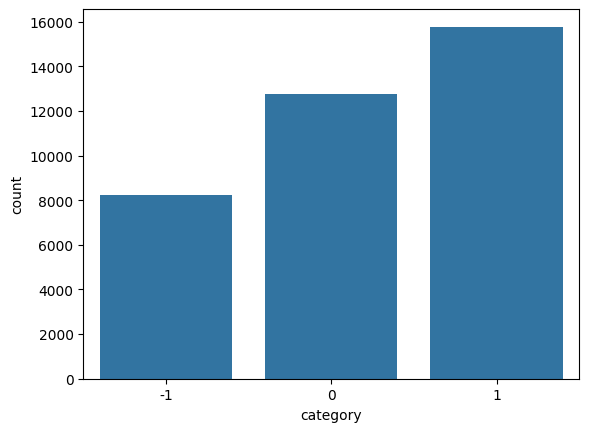

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = df, x = 'category')

In [68]:
# Frequncy distribution of sentitments
round(df['category'].value_counts(normalize = True) * 100, 2)

category
 1    42.86
 0    34.71
-1    22.42
Name: proportion, dtype: float64

Find the word count in each comment and add it as a new feature in our dataset

In [71]:
df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))

In [72]:
df.head()

,clean_comment,category,word_count
0,family mormon have never tried explain them th...,1,39
1,buddhism has very much lot compatible with chr...,1,196
2,seriously don say thing first all they won get...,-1,86
3,what you have learned yours and only yours wha...,0,29
4,for your own benefit you may want read living ...,1,112


In [73]:
df['word_count'].describe()

count    36793.000000
mean        29.667464
std         56.790738
min          1.000000
25%          6.000000
50%         13.000000
75%         30.000000
max       1307.000000
Name: word_count, dtype: float64

1. Average word count in a sentence is 13 words.
2. Lowest word count is 1 word.
3. Highest word count is 1307 words in a sentence. 

Understand the distribution of word count in our dataset

C:\Users\RadhikaMaheshwari\AppData\Local\Temp\ipykernel_18616\696346186.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['word_count'], kde = True)


<Axes: xlabel='word_count', ylabel='Density'>

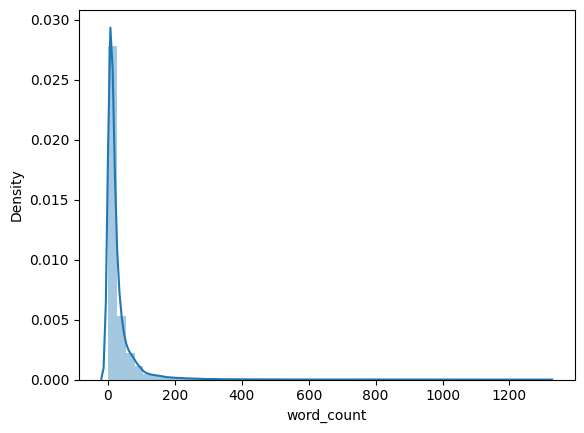

In [74]:
sns.distplot(df['word_count'], kde = True)

Understanding the word distribution per category

In [78]:
df.head()

,clean_comment,category,word_count
0,family mormon have never tried explain them th...,1,39
1,buddhism has very much lot compatible with chr...,1,196
2,seriously don say thing first all they won get...,-1,86
3,what you have learned yours and only yours wha...,0,29
4,for your own benefit you may want read living ...,1,112


<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

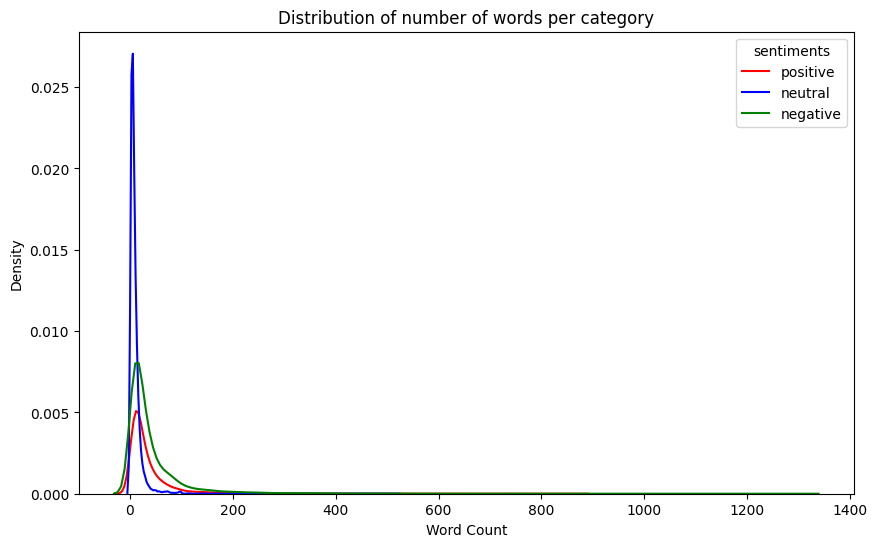

In [85]:
plt.figure(figsize = (10, 6))

sns.kdeplot(data = df, 
            hue = 'category', 
            x = 'word_count', 
            hue_order = [1, 0, -1], palette = {1: 'green', 0: 'blue',  -1: 'red'}).legend(title = 'sentiments', labels = ['positive', 'neutral', 'negative'])

plt.title("Distribution of number of words per category")
plt.xlabel("Word Count")
plt.ylabel("Density")
plt.legend

Positive comments tend to have a wider spread in word count indicating that longer comments are more common in positive sentiment.
Neutral comment's distribution appears to be concentrated more around shorter comments compared to positive or negative comments. 
Negative comments have a distribution somewhat similar to positive comments but with a smaller prop

Box plot on word count

<Axes: ylabel='word_count'>

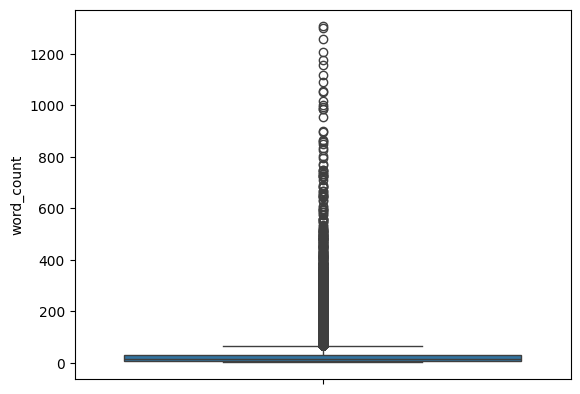

In [86]:
sns.boxplot(df['word_count'])

Boxplot for word count per category

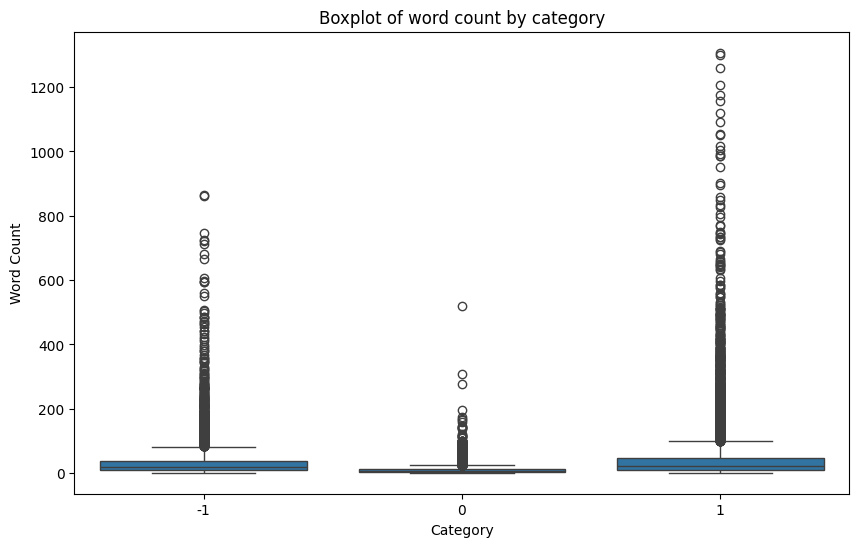

In [87]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df, x = 'category', y = 'word_count')
plt.title('Boxplot of word count by category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

Positive comments: Median word count is relatively high. There are several outliers with longer comments indicating that positive comments tend to be more verbose

Neutral comments: Median word count is the lowest with a tighter IQR suggesting that neutral comments are generally shorter. 

Negative comments: Word count distribution is similar to positive comments but with a slightly lower median and fewer outliers. 

Scatterplot between category and word count to understand the relationship between them

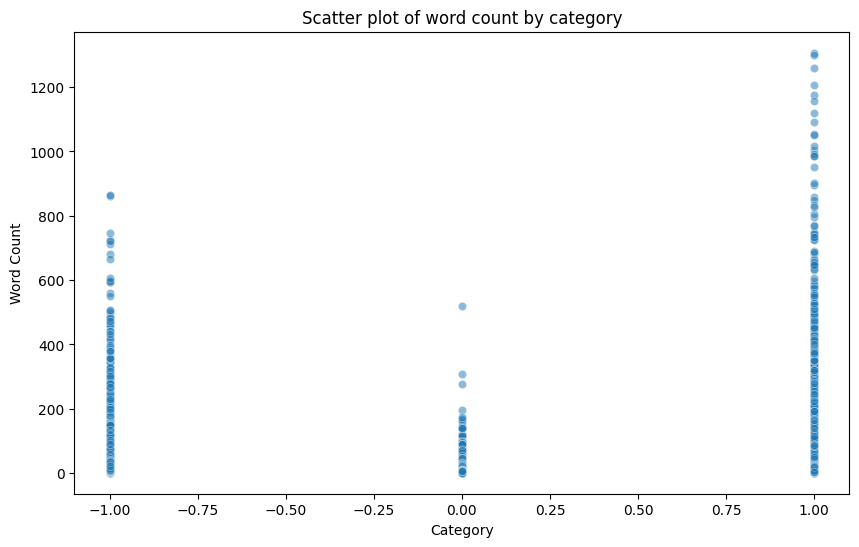

In [88]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = df, x = 'category', y = 'word_count', alpha = 0.5)
plt.title("Scatter plot of word count by category")
plt.xlabel("Category")
plt.ylabel("Word Count")
plt.show()

Plot the median word count for each category

<Axes: xlabel='category', ylabel='word_count'>

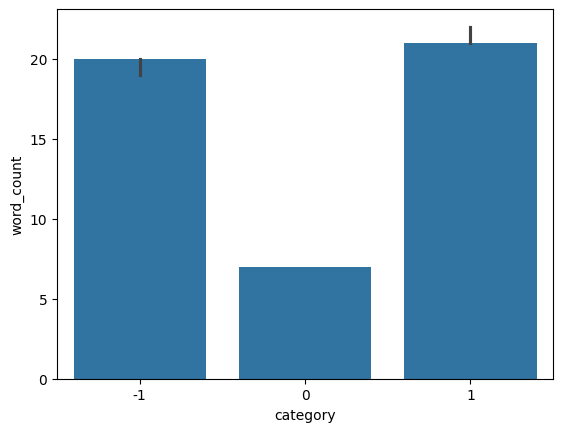

In [89]:
sns.barplot(df, x = 'category', y = 'word_count', estimator = 'median')

We can see that the neutral category has the lowest median word count followed by negative and then positive comments

In [95]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RadhikaMaheshwari\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package stopwords is already up-to-date!


True

In [97]:
# Define the list of stopwords in english

stop_words = set(stopwords.words('english'))

In [ ]:
# Create a new column which will store the count of stop words in each comment

df['clean_words']